<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов." data-toc-modified-id="Взвешивание-классов.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов.</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)


# Признаки

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

# Целевой признак

* Exited — факт ухода клиента

## Подготовка данных

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.metrics import f1_score, mean_absolute_error, accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv('Churn.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
df_try = df.copy()

In [ ]:
temp = df.copy()
list_c = [
    'RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
    'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
    'IsActiveMember', 'EstimatedSalary', 'Exited']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
-------------------------
RowNumber [    1     2     3 ...  9998  9999 10000]
RowNumber :

В столбце Tenure есть пропуски, удалим их.

In [ ]:
df = df.dropna(subset=['Tenure'])

In [ ]:
df['Tenure'].isna().sum()

0

Пропуски удалены.

Приведем все столбцы к нижнему регистру.

In [ ]:
df.columns = map(str.lower, df.columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        9091 non-null   int64  
 1   customerid       9091 non-null   int64  
 2   surname          9091 non-null   object 
 3   creditscore      9091 non-null   int64  
 4   geography        9091 non-null   object 
 5   gender           9091 non-null   object 
 6   age              9091 non-null   int64  
 7   tenure           9091 non-null   float64
 8   balance          9091 non-null   float64
 9   numofproducts    9091 non-null   int64  
 10  hascrcard        9091 non-null   int64  
 11  isactivemember   9091 non-null   int64  
 12  estimatedsalary  9091 non-null   float64
 13  exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


Удалим столбцы которые нам не понадобятся:
* rownumber
* customerid
* surname

In [ ]:
df.drop(['rownumber', 'customerid', 'surname'], axis='columns', inplace=True)

В датасете есть столбцы с категориальными признаками:
* geography
* gender

При помощи техники прямого кодирования преобразуем категориальные признаки в численные.

In [ ]:
df_ohe = pd.get_dummies(df, drop_first=True)

In [ ]:
df_ohe.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Для корректного обучения разобьем дата сет на 3 выборки - обучающую, валидационную и тестовую.

Разобьем в пропорции 60%/20%/20%

In [ ]:
features = df_ohe.drop(['exited'],axis=1)
target = df_ohe['exited']

In [ ]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=1234)

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size=0.25, random_state=1234)

In [ ]:
print(target.shape, target_train.shape, target_test.shape, target_test.shape)

(9091,) (5454,) (1818,) (1818,)


Маштабируем признаки методом стандартизации.

In [ ]:
numeric = ['creditscore', 'age', 'balance', 'estimatedsalary', 'tenure', 'numofproducts']

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

In [ ]:
features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
8588,0.643864,-0.930050,0.701418,0.014692,-0.908567,1,0,0.399358,0,1,0
7149,0.311599,-0.175944,-0.338978,-1.233952,0.828924,1,0,-0.661558,0,0,1
9311,-0.674812,1.049478,-1.032575,0.782691,-0.908567,1,0,-1.557987,1,0,1
990,0.052017,-0.175944,0.007821,0.258704,0.828924,1,0,-0.575496,0,0,1
8581,-0.674812,0.389635,-1.032575,-1.233952,0.828924,1,0,-0.174219,0,0,0


**Вывод**
* Удалили пропуски из столбца tenure
* Привели столбцы к нижнему регистру
* Удалили столбцы которые не понадобятся в дальнейшей работе
* Преобразовали категориальные признаки в численные
* Разбили датасет на 3 выборки
  * target_train - обучающая 60%
  * target_test - тестовая 20%
  * target_test - валидационная 20%
* Маштабировали признаки методом стандартизации.

## Исследование задачи

Обучим модели без предварительной оценки баланса классов.

**DecisionTreeClassifier**

Accuracy лучшей модели дерева решений на валидационной выборке: 0.8664101154480484 Глубина дерева: 5
-------------------------
F1 = 0.5668449197860962
-------------------------
ROC AUC 0.8461485051155598
-------------------------
0    0.893348
1    0.106652
dtype: float64
-------------------------


<AxesSubplot:>

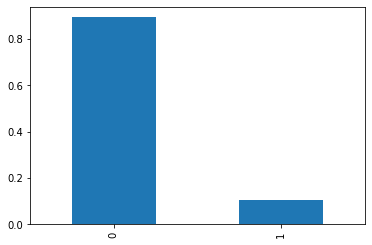

In [ ]:
best_model_decision = None
best_result = 0
best_depth = 0
best_f1_score = 0
best_class_decision = None
best_auc_roc_decision = 0
for depth in range(1, 20):
    model_decision = DecisionTreeClassifier(random_state=1234, max_depth=depth)
    model_decision.fit(features_train, target_train)
    predicted_valid_decision = pd.Series(model_decision.predict(features_valid))
    result = accuracy_score(target_valid, predicted_valid_decision)
    class_decision = predicted_valid_decision.value_counts(normalize=True)
    f1_decision = f1_score(target_valid, predicted_valid_decision)

    probabilities_decision = model_decision.predict_proba(features_valid)
    probabilities_one_decision = probabilities_decision[:, 1]
    auc_roc_decision = roc_auc_score(target_valid, probabilities_one_decision)

    if result > best_result:
        best_model_decision = model_decision
        best_result = result
        best_depth = depth
        best_f1_score = f1_decision
        best_class_decision = class_decision
        best_auc_roc_decision = auc_roc_decision

print("Accuracy лучшей модели дерева решений на валидационной выборке:", best_result, "Глубина дерева:", best_depth)
print('-'* 25)
print('F1 =', best_f1_score)
print('-'* 25)
print('ROC AUC', best_auc_roc_decision)
print('-'* 25)
print(best_class_decision)
print('-'* 25)
best_class_decision.plot(kind='bar')


**RandomForestClassifier**

Accuracy наилучшей модели случайного леса на валидационной выборке: 0.8763056624518967 Количество деревьев: 50 Максимальная глубина: 12
-------------------------
F1 = 0.6017699115044248
-------------------------
ROC AUC 0.8623377695708633
-------------------------
0    0.891149
1    0.108851
dtype: float64
-------------------------


<AxesSubplot:>

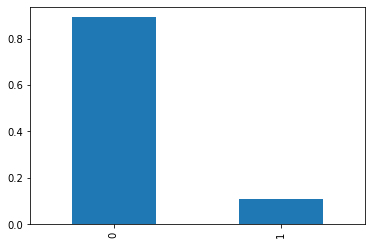

In [ ]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_f1_score = 0
best_class_forest = None
best_auc_roc_forest = 0
for est in range(10, 160, 10):
    for depth in range (1, 13):
        model_forest = RandomForestClassifier(random_state=1234, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predicted_valid_forest = pd.Series(model_forest.predict(features_valid))
        result = accuracy_score(target_valid, predicted_valid_forest)
        class_forest = predicted_valid_forest.value_counts(normalize=True)
        f1_forest = f1_score(target_valid, predicted_valid_forest)

        probabilities_forest = model_forest.predict_proba(features_valid)
        probabilities_one_forest = probabilities_forest[:, 1]
        auc_roc_forest = roc_auc_score(target_valid, probabilities_one_forest)

        if result > best_result:
            best_model_forest = model_forest
            best_result = result
            best_est = est
            best_depth = depth
            best_f1_score = f1_forest
            best_class_forest = class_forest
            best_auc_roc_forest = auc_roc_forest

print("Accuracy наилучшей модели случайного леса на валидационной выборке:", best_result,
      "Количество деревьев:", best_est, "Максимальная глубина:", depth)
print('-'* 25)
print('F1 =', best_f1_score)
print('-'* 25)
print('ROC AUC', best_auc_roc_forest)
print('-'* 25)
print(best_class_forest)
print('-'* 25)
best_class_forest.plot(kind='bar')

**LogisticRegression**

Accuracy лучшей модели дерева решений на валидационной выборке: 0.868609125893348 Количество итераций: 100
-------------------------
F1 = 0.31237322515212984
-------------------------
ROC AUC 0.7627175895692121
-------------------------
0    0.930731
1    0.069269
dtype: float64
-------------------------


<AxesSubplot:>

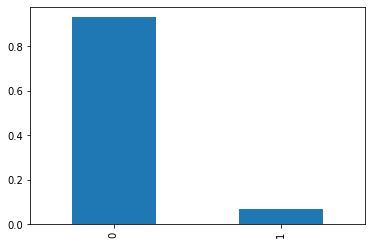

In [ ]:
best_model_logistic = None
best_result = 0
best_iteration = 0
best_f1_score = 0
best_class_logistic = None
best_auc_roc_logistic = 0
for iteration in range(100, 1000, 100):
    model_logistic = LogisticRegression(random_state=1234, solver='liblinear', max_iter=iteration)
    model_logistic.fit(features_train, target_train)
    predicted_valid_logistic = pd.Series(model_logistic.predict(features_valid))
    result = accuracy_score(target_valid, predicted_valid_forest)
    class_logistic = predicted_valid_logistic.value_counts(normalize=True)
    f1_forest = f1_score(target_valid, predicted_valid_logistic)

    probabilities_logistic = model_logistic.predict_proba(features_valid)
    probabilities_one_logistic = probabilities_logistic[:, 1]
    auc_roc_logistic = roc_auc_score(target_valid, probabilities_one_logistic)

    if result > best_result:
        best_model_logistic = model_logistic
        best_result = result
        best_iteration = iteration
        best_f1_score = f1_forest
        best_class_logistic = class_logistic
        best_auc_roc_logistic = auc_roc_logistic

print("Accuracy лучшей модели дерева решений на валидационной выборке:", best_result, "Количество итераций:", best_iteration,)
print('-'* 25)
print('F1 =', best_f1_score)
print('-'* 25)
print('ROC AUC', best_auc_roc_logistic)
print('-'* 25)
print(best_class_logistic)
print('-'* 25)
best_class_logistic.plot(kind='bar')

**Баланс классов**

0    0.796062
1    0.203938
Name: exited, dtype: float64
-------------------------


<AxesSubplot:>

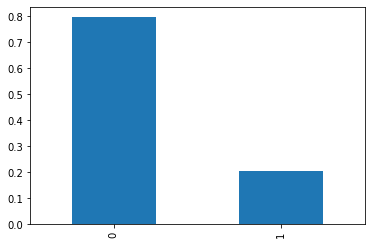

In [ ]:
class_frequency = df['exited'].value_counts(normalize=True)
print(class_frequency)
print('-'* 25)
class_frequency.plot(kind='bar')

In [ ]:
target_pred_constant = pd.Series(0, index=target.index)
accuracy_score(target, target_pred_constant)

0.7960620393796062

**Вывод**
1. Провели иследование по трем моделям:
 * DecisionTreeClassifier
 * RandomForestClassifier
 * LogisticRegression

 Лучше всего себя показала модель: RandomForestClassifier где f1 = 0.60, что уже лучше требуемой в задании (0,59)
2. Посмотрели баланс классов. Классы различаются примерно в 4 раза.
3. Выяснили, что отток клиентов составляет 20%. Показатели у моделей более оптимистичные.

## Борьба с дисбалансом

### Взвешивание классов.

**DecisionTreeClassifier**

In [ ]:
best_model_decision = None
best_depth = 0
best_f1_score = 0
for depth in range(1, 11):
    model_decision = DecisionTreeClassifier(random_state=1234, max_depth=depth, class_weight='balanced')
    model_decision.fit(features_train, target_train)
    predicted_valid_decision = model_decision.predict(features_valid)
    f1_decision = f1_score(target_valid, predicted_valid_decision)
    if f1_decision > best_f1_score:
        best_model_decision = model_decision
        best_depth = depth
        best_f1_score = f1_decision
print('F1 =', best_f1_score, "Глубина дерева:", best_depth)
print('-'* 25)

F1 = 0.5714285714285714 Глубина дерева: 3
-------------------------


**RandomForestClassifier**

In [ ]:
best_model = None
best_est = 0
best_depth = 0
best_f1_score = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=1234, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_forest.fit(features_train, target_train)
        predicted_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predicted_valid_forest)
        if f1_forest > best_f1_score:
            best_model_forest = model_forest
            best_est = est
            best_depth = depth
            best_f1_score = f1_forest

print('F1 =', best_f1_score,
      "Количество деревьев:", best_est, "Максимальная глубина:", depth)
print('-'* 25)

F1 = 0.6161490683229813 Количество деревьев: 50 Максимальная глубина: 10
-------------------------


**LogisticRegression**

In [ ]:
best_model_logistic = None
best_depth = 0
best_f1_score = 0
best_class_logistic = None
for depth in range(100, 1000, 100):
    model_logistic = LogisticRegression(random_state=1234, solver='liblinear', max_iter=depth, class_weight='balanced')
    model_logistic.fit(features_train, target_train)
    predicted_valid_logistic = model_logistic.predict(features_valid)
    f1_logistic = f1_score(target_valid, predicted_valid_logistic)
    if f1_logistic > best_f1_score:
        best_model_logistic = model_logistic
        best_depth = depth
        best_f1_score = f1_logistic
print('F1 =', best_f1_score, "Количество итераций:", best_depth,)
print('-'* 25)



F1 = 0.49630996309963105 Количество итераций: 100
-------------------------


**Вывод:**

Самый лучший результат показала снова модель: RandomForestClassifier
Так же показатели F1 стали еще лучше: 0,61 > 0.60

### Увеличение выборки

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1234)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [ ]:
target_train.value_counts()

0    4332
1    1122
Name: exited, dtype: int64

In [ ]:
target_upsampled.value_counts()

1    4488
0    4332
Name: exited, dtype: int64

**DecisionTreeClassifier**

In [ ]:
best_model_decision = None
best_depth = 0
best_f1_score = 0
for depth in range(1, 11):
    model_decision = DecisionTreeClassifier(random_state=1234, max_depth=depth)
    model_decision.fit(features_upsampled, target_upsampled)
    predicted_valid_decision = model_decision.predict(features_valid)
    f1_decision = f1_score(target_valid, predicted_valid_decision)
    if f1_decision > best_f1_score:
        best_model_decision = model_decision
        best_depth = depth
        best_f1_score = f1_decision
print('F1 =', best_f1_score, "Глубина дерева:", best_depth)
print('-'* 25)

F1 = 0.5714285714285714 Глубина дерева: 3
-------------------------


**RandomForestClassifier**

In [ ]:
best_model = None
best_est = 0
best_depth = 0
best_f1_score = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=1234, n_estimators=est, max_depth=depth)
        model_forest.fit(features_upsampled, target_upsampled)
        predicted_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predicted_valid_forest)
        if f1_forest > best_f1_score:
            best_model_forest = model_forest
            best_est = est
            best_depth = depth
            best_f1_score = f1_forest

print('F1 =', best_f1_score,
      "Количество деревьев:", best_est, "Максимальная глубина:", depth)
print('-'* 25)

F1 = 0.6063454759106933 Количество деревьев: 50 Максимальная глубина: 10
-------------------------


**LogisticRegression**

In [ ]:
best_model_logistic = None
best_depth = 0
best_f1_score = 0
best_class_logistic = None
for depth in range(100, 1000, 100):
    model_logistic = LogisticRegression(random_state=1234, solver='liblinear', max_iter=depth)
    model_logistic.fit(features_upsampled, target_upsampled)
    predicted_valid_logistic = model_logistic.predict(features_valid)
    f1_logistic = f1_score(target_valid, predicted_valid_logistic)
    if f1_logistic > best_f1_score:
        best_model_logistic = model_logistic
        best_depth = depth
        best_f1_score = f1_logistic
print('F1 =', best_f1_score, "Количество итераций:", best_depth,)
print('-'* 25)

F1 = 0.49138712601994555 Количество итераций: 100
-------------------------


**Вывод**

Увеличение выборки дал хуже результаты чем баланс классов:
   * DecisionTreeClassifier 0.57
   * RandomForestClassifier 0.60
   * LogisticRegression 0.49

### Уменьшение выборки

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=1234)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=1234)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1234)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)

In [ ]:
target_train.value_counts()

0    4332
1    1122
Name: exited, dtype: int64

In [ ]:
target_downsampled.value_counts()

0    1126
1    1122
Name: exited, dtype: int64

**DecisionTreeClassifier**

In [ ]:
best_model_decision = None
best_depth = 0
best_f1_score = 0
for depth in range(1, 11):
    model_decision = DecisionTreeClassifier(random_state=1234, max_depth=depth)
    model_decision.fit(features_downsampled, target_downsampled)
    predicted_valid_decision = model_decision.predict(features_valid)
    f1_decision = f1_score(target_valid, predicted_valid_decision)
    if f1_decision > best_f1_score:
        best_model_decision = model_decision
        best_depth = depth
        best_f1_score = f1_decision
print('F1 =', best_f1_score, "Глубина дерева:", best_depth)
print('-'* 25)

F1 = 0.5603357817418677 Глубина дерева: 7
-------------------------


**RandomForestClassifier**

In [ ]:
best_model = None
best_est = 0
best_depth = 0
best_f1_score = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=1234, n_estimators=est, max_depth=depth)
        model_forest.fit(features_downsampled, target_downsampled)
        predicted_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predicted_valid_forest)
        if f1_forest > best_f1_score:
            best_model_forest = model_forest
            best_est = est
            best_depth = depth
            best_f1_score = f1_forest

print('F1 =', best_f1_score,
      "Количество деревьев:", best_est, "Максимальная глубина:", depth)
print('-'* 25)

F1 = 0.5876393110435664 Количество деревьев: 50 Максимальная глубина: 10
-------------------------


**LogisticRegression**

In [ ]:
best_model_logistic = None
best_depth = 0
best_f1_score = 0
best_class_logistic = None
for depth in range(100, 1000, 100):
    model_logistic = LogisticRegression(random_state=1234, solver='liblinear', max_iter=depth)
    model_logistic.fit(features_downsampled, target_downsampled)
    predicted_valid_logistic = model_logistic.predict(features_valid)
    f1_logistic = f1_score(target_valid, predicted_valid_logistic)
    if f1_logistic > best_f1_score:
        best_model_logistic = model_logistic
        best_depth = depth
        best_f1_score = f1_logistic
print('F1 =', best_f1_score, "Количество итераций:", best_depth,)
print('-'* 25)

F1 = 0.4954462659380692 Количество итераций: 100
-------------------------


**Вывод**

Уменьшение выборки так же показал плохие результаты:
   * DecisionTreeClassifier 0.56
   * RandomForestClassifier 0.58
   * LogisticRegression 0.49

### Изменение порога

**DecisionTreeClassifier**

In [ ]:
model = RandomForestClassifier(random_state=1234, max_depth=3)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.202, Полнота = 1.000, F1 = 0.336
Порог = 0.02 | Точность = 0.202, Полнота = 1.000, F1 = 0.336
Порог = 0.04 | Точность = 0.202, Полнота = 1.000, F1 = 0.336
Порог = 0.06 | Точность = 0.202, Полнота = 1.000, F1 = 0.336
Порог = 0.08 | Точность = 0.202, Полнота = 1.000, F1 = 0.336
Порог = 0.10 | Точность = 0.212, Полнота = 0.995, F1 = 0.350
Порог = 0.12 | Точность = 0.239, Полнота = 0.975, F1 = 0.383
Порог = 0.14 | Точность = 0.285, Полнота = 0.921, F1 = 0.436
Порог = 0.16 | Точность = 0.336, Полнота = 0.883, F1 = 0.486
Порог = 0.18 | Точность = 0.389, Полнота = 0.812, F1 = 0.526
Порог = 0.20 | Точность = 0.423, Полнота = 0.752, F1 = 0.542
Порог = 0.22 | Точность = 0.491, Полнота = 0.706, F1 = 0.579
Порог = 0.24 | Точность = 0.531, Полнота = 0.654, F1 = 0.586
Порог = 0.26 | Точность = 0.578, Полнота = 0.619, F1 = 0.597
Порог = 0.28 | Точность = 0.621, Полнота = 0.580, F1 = 0.600


**RandomForestClassifier**

In [ ]:
model = RandomForestClassifier(random_state=1234, n_estimators=20, max_depth=10)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.202, Полнота = 1.000, F1 = 0.336
Порог = 0.02 | Точность = 0.213, Полнота = 1.000, F1 = 0.351
Порог = 0.04 | Точность = 0.234, Полнота = 0.986, F1 = 0.379
Порог = 0.06 | Точность = 0.258, Полнота = 0.959, F1 = 0.407
Порог = 0.08 | Точность = 0.285, Полнота = 0.948, F1 = 0.438
Порог = 0.10 | Точность = 0.310, Полнота = 0.916, F1 = 0.463
Порог = 0.12 | Точность = 0.341, Полнота = 0.888, F1 = 0.493
Порог = 0.14 | Точность = 0.366, Полнота = 0.858, F1 = 0.513
Порог = 0.16 | Точность = 0.397, Полнота = 0.837, F1 = 0.538
Порог = 0.18 | Точность = 0.428, Полнота = 0.807, F1 = 0.560
Порог = 0.20 | Точность = 0.453, Полнота = 0.774, F1 = 0.571
Порог = 0.22 | Точность = 0.471, Полнота = 0.728, F1 = 0.572
Порог = 0.24 | Точность = 0.507, Полнота = 0.706, F1 = 0.590
Порог = 0.26 | Точность = 0.528, Полнота = 0.673, F1 = 0.592
Порог = 0.28 | Точность = 0.550, Полнота = 0.649, F1 = 0.595


**LogisticRegression**

In [ ]:
model = LogisticRegression(random_state=1234, solver='liblinear', max_iter=100)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.202, Полнота = 1.000, F1 = 0.336
Порог = 0.02 | Точность = 0.203, Полнота = 1.000, F1 = 0.337
Порог = 0.04 | Точность = 0.211, Полнота = 0.984, F1 = 0.348
Порог = 0.06 | Точность = 0.226, Полнота = 0.951, F1 = 0.366
Порог = 0.08 | Точность = 0.243, Полнота = 0.932, F1 = 0.385
Порог = 0.10 | Точность = 0.265, Полнота = 0.907, F1 = 0.410
Порог = 0.12 | Точность = 0.279, Полнота = 0.872, F1 = 0.423
Порог = 0.14 | Точность = 0.303, Полнота = 0.842, F1 = 0.445
Порог = 0.16 | Точность = 0.323, Полнота = 0.823, F1 = 0.464
Порог = 0.18 | Точность = 0.341, Полнота = 0.771, F1 = 0.473
Порог = 0.20 | Точность = 0.358, Полнота = 0.733, F1 = 0.481
Порог = 0.22 | Точность = 0.372, Полнота = 0.684, F1 = 0.482
Порог = 0.24 | Точность = 0.397, Полнота = 0.638, F1 = 0.490
Порог = 0.26 | Точность = 0.420, Полнота = 0.594, F1 = 0.492
Порог = 0.28 | Точность = 0.425, Полнота = 0.537, F1 = 0.475


**Вывод**
Изменение порога показал более лучшие результаты относительно увеличени и уменьшения выборки:
   * DecisionTreeClassifier 0.600
   * RandomForestClassifier 0.595
   * LogisticRegression 0.492

Благодаря изменениям порогов удалось в DecisionTreeClassifier улучшить показатели до 0,60, что больше чем требуется в задании 0,59

## Тестирование модели

Теперь обучим модель случайного леса и протестируем с успешными гиперпараметрами n_estimators=20 и max_depth=10, уравновешенную по классам.

In [ ]:
model = RandomForestClassifier(random_state=1234, n_estimators=20, max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)
print('F1 =', f1)

F1 = 0.6024423337856174


F1 достигнута и соответствует заявленному минимому 0,59

In [ ]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]


auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8566668866492565


Метрика AUC-ROC отличается от значения для RandomForestClassifier (0,87).

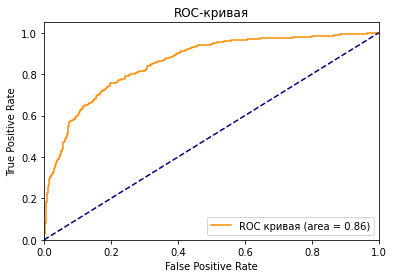

In [ ]:
fpr, tpr, treshold = roc_curve(target_test, probabilities_one_test)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

# Общий вывод:

1. Ознакомились с данными и подготовили их к исследованию (преобразовали категориальные признаки в численные с помощью техники прямого кодирования One-Hot Encoding,удалили пропуски, убрали лишнии столбцы, разбили получившийся датасет на 3 выборки - обучающую, валидационную и тестовую, масштабировали признаки методом стандартизации).

2. Исследовали баланс классов - они оказались несбалансированы, изучили модели без учёта дисбаланса, выяснили, что результат работы модели случайного леса лучше.

3. Применили 4 способа борбы с дисбалансом - взвешивание классов, увелечение выборки, уменьшение выборки и изменение порога. Лучшие результаты показал способы борьбы с дисбалансом это взвешивание классов. Достигли F1 = 0.61 в модели RandomForestClassifier

4. Обучили финальную модель и проверили ее на тестовой выборке. Достигли значения F1 = 0.60. Исследовали метрику AUC-ROC - ее значение в данном случае почти не отличается от значения для RandomForestClassifier (0.87)